# Two Handy Tricks

In this lecture, we'll go over a few neat tricks with `pandas` data frames. These aren't things that are always necessary when analyzing data, but can often make your life significantly easier. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
penguins = pd.read_csv("palmer_penguins.csv")

cols = ["Species", "Region", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Sex"]

# select a subset of columns
penguins = penguins[cols]

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

penguins.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Sex
0,Adelie,Anvers,Torgersen,39.1,18.7,MALE
1,Adelie,Anvers,Torgersen,39.5,17.4,FEMALE
2,Adelie,Anvers,Torgersen,40.3,18.0,FEMALE
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,36.7,19.3,FEMALE


## Recoding Columns

In many cases, we might want to recode the data in columns. For example, suppose I'd like to recode the data for the sex of the penguins, replacing "MALE" and "FEMALE" with "m" and "f", respectively. We'd also like to replace the `NaN` values with "unknown."  The most versatile way to do this is to manually specify the recoding map using a dictionary and the `map()` method. 

In [3]:
penguins.Sex

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: Sex, Length: 344, dtype: object

In [4]:
# keys are original data codes 
# values are new codes
recode = {
    "MALE"   : "m",
    "FEMALE" : "f",
     np.nan  : "unknown"
}

penguins["Sex"] = penguins["Sex"].map(recode)

In [5]:
penguins["Sex"]

0            m
1            f
2            f
3      unknown
4            f
        ...   
339    unknown
340          f
341          m
342          f
343          m
Name: Sex, Length: 344, dtype: object

## The `apply` method

Somewhat confusingly, the `apply()` method is not the method used in standard split-apply-combine operations -- `aggregate()` is your go-to. The `apply` method is used when you want to operate on groups without necessarily producing a reduced data frame. 

When using `apply()`, it is necessary to supply a function whose first argument is a data frame. This function will be applied to each group. 

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


""


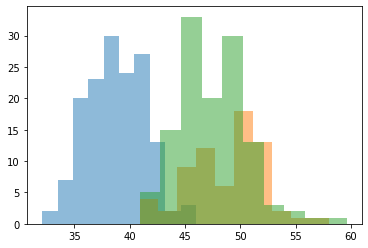

In [6]:
fig, ax = plt.subplots(1)

def plot_hist(df):
    ax.hist(df['Culmen Length (mm)'], alpha = 0.5)

penguins.groupby("Species").apply(plot_hist)

Further arguments can be specified as `*args` or `**kwargs` to the call to `apply`. 

""


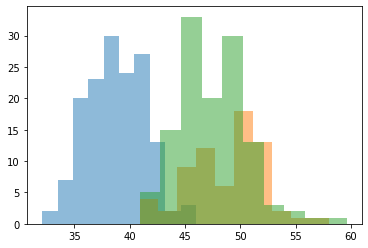

In [7]:
fig, ax = plt.subplots(1)

def plot_hist(df, colname, alpha):
    ax.hist(df[colname], alpha = alpha)

penguins.groupby("Species").apply(plot_hist, 'Culmen Length (mm)', 0.5)

Use of `apply` can save you from having to write `for`-loops when iterating over the possible values of data in a column. 